<div class="alert">
<div style="direction:ltr;text-align:center;font-family: B Tahoma; font-size:24pt"> Practical Deep Learning Course for Computer Vision
</div>
</div>

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Multi-Layer Perceptron (MLP)
</div>
</div>

<img src="./images/MLP-deep.png" alt="Overfitting">
<a href="https://www.researchgate.net/profile/Ryan_Heartfield/publication/321341597/figure/fig5/AS:667675554480148@1536197665532/MLP-deep-learning-architecture.ppm">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Import the required libraries.<br>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from keras.utils import to_categorical

Using TensorFlow backend.


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Load the dataset:
</div>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Displaying the dataset:
</div>

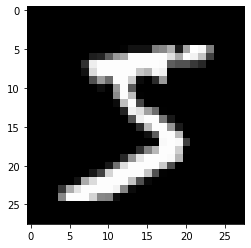

In [3]:
plt.imshow(x_train[0], cmap='gray')

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Normalize the dataset between 0 and 1:
</div>

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (3072,)
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# One-hot encoding the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
60000 train samples
10000 test samples


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Defining the classifier:
</div>

In [5]:
model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)), 
                             tf.keras.layers.Dense(64, activation='relu'), 
                             tf.keras.layers.Dense(10, activation='softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Fitting the classifier:
</div>

In [8]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 80us/sample - loss: 0.2898 - accuracy: 0.9166 - val_loss: 0.1239 - val_accuracy: 0.9650
Epoch 2/10
54000/54000 [==============================] - 3s 58us/sample - loss: 0.1174 - accuracy: 0.9652 - val_loss: 0.0986 - val_accuracy: 0.9715
Epoch 3/10
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0800 - accuracy: 0.9762 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 4/10
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.0774 - val_accuracy: 0.9772
Epoch 5/10
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0797 - val_accuracy: 0.9770
Epoch 6/10
54000/54000 [==============================] - 4s 67us/sample - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0783 - val_accuracy: 0.9788
Epoch 7/10
54000/54000 [==============================] -

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Evaluating the classifier:
</div>

In [9]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy is %.2f %%" %(accuracy * 100))

Accuracy is 97.78 %


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Predicting with the classifier:
</div>

In [10]:
sample = 20

X = np.expand_dims(x_test[sample], axis=0)

predicted_class = model.predict_classes(X).squeeze()
predicted_probability = model.predict(X).squeeze()
actual_class = np.argmax(y_test[sample])

print ("The actual label: {} \nThe predicted label: {} \nThe probablities: {}".format(actual_class, 
                                                                                      predicted_class, 
                                                                                      predicted_probability))

The actual label: 9 
The predicted label: 9 
The probablities: [2.9343497e-10 1.6206032e-07 1.3270846e-11 6.9517683e-11 3.5669768e-06
 1.3799050e-07 6.1237954e-15 1.9946845e-05 3.2798678e-07 9.9997580e-01]


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Plotting the result:
</div>

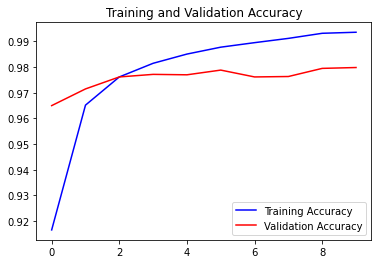

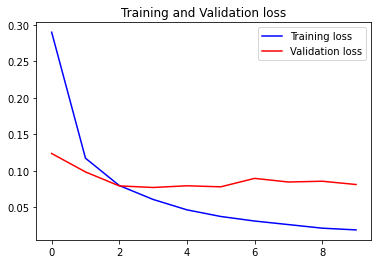

In [11]:
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Practical Deep Learning Course for Computer Vision
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>